In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality-prediction-b1/train.csv
/kaggle/input/wine-quality-prediction-b1/test.csv
/kaggle/input/wine-quality-prediction-b1/sample_submissionfile.csv


In [ ]:
# https://www.kaggle.com/competitions/wine-quality-prediction-b1

In [3]:
data = pd.read_csv("/kaggle/input/wine-quality-prediction-b1/train.csv")
test = pd.read_csv("/kaggle/input/wine-quality-prediction-b1/test.csv")
ss = pd.read_csv("/kaggle/input/wine-quality-prediction-b1/sample_submissionfile.csv")
data.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,1,7.1,0.29,0.30,16.0,0.036,58.0,201.0,0.99954,3.30,0.67,9.0,5
1,2,6.8,0.23,0.31,2.8,0.047,40.0,122.0,0.99126,3.06,0.64,10.9,7
2,3,7.1,0.39,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6,5
3,4,6.4,0.17,0.27,9.9,0.047,26.0,101.0,0.99596,3.34,0.50,9.9,6
4,5,6.0,0.31,0.27,2.3,0.042,19.0,120.0,0.98952,3.32,0.41,12.7,7


In [4]:
print(data.shape)
print(test.shape)

(3950, 13)
(948, 12)


In [5]:
X = data.drop("Quality", axis=1)
y = data.loc[:, "Quality"]
X.head() 

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.1,0.29,0.30,16.0,0.036,58.0,201.0,0.99954,3.30,0.67,9.0
1,2,6.8,0.23,0.31,2.8,0.047,40.0,122.0,0.99126,3.06,0.64,10.9
2,3,7.1,0.39,0.35,12.5,0.044,26.0,72.0,0.99410,3.17,0.29,11.6
3,4,6.4,0.17,0.27,9.9,0.047,26.0,101.0,0.99596,3.34,0.50,9.9
4,5,6.0,0.31,0.27,2.3,0.042,19.0,120.0,0.98952,3.32,0.41,12.7


In [6]:
# content

# 1. preprocessing, model
# 2. chi2
# 3. mutual
# 4. recurse feature elemination with cross validation
# 5. confusion matric + metrics

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_data = sc.transform(test)

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [11]:
# wont work for negative values

bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X_train, y_train)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [32]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['l1', 'l2']
featureScores

,l1,l2
0,ID,0.005195
1,fixed acidity,0.024406
2,volatile acidity,0.026733
3,citric acid,0.052659
4,residual sugar,0.102211
5,chlorides,0.054957
6,free sulfur dioxide,0.044274
7,total sulfur dioxide,0.082688
8,density,0.168955
9,pH,0.021754


<Axes: >

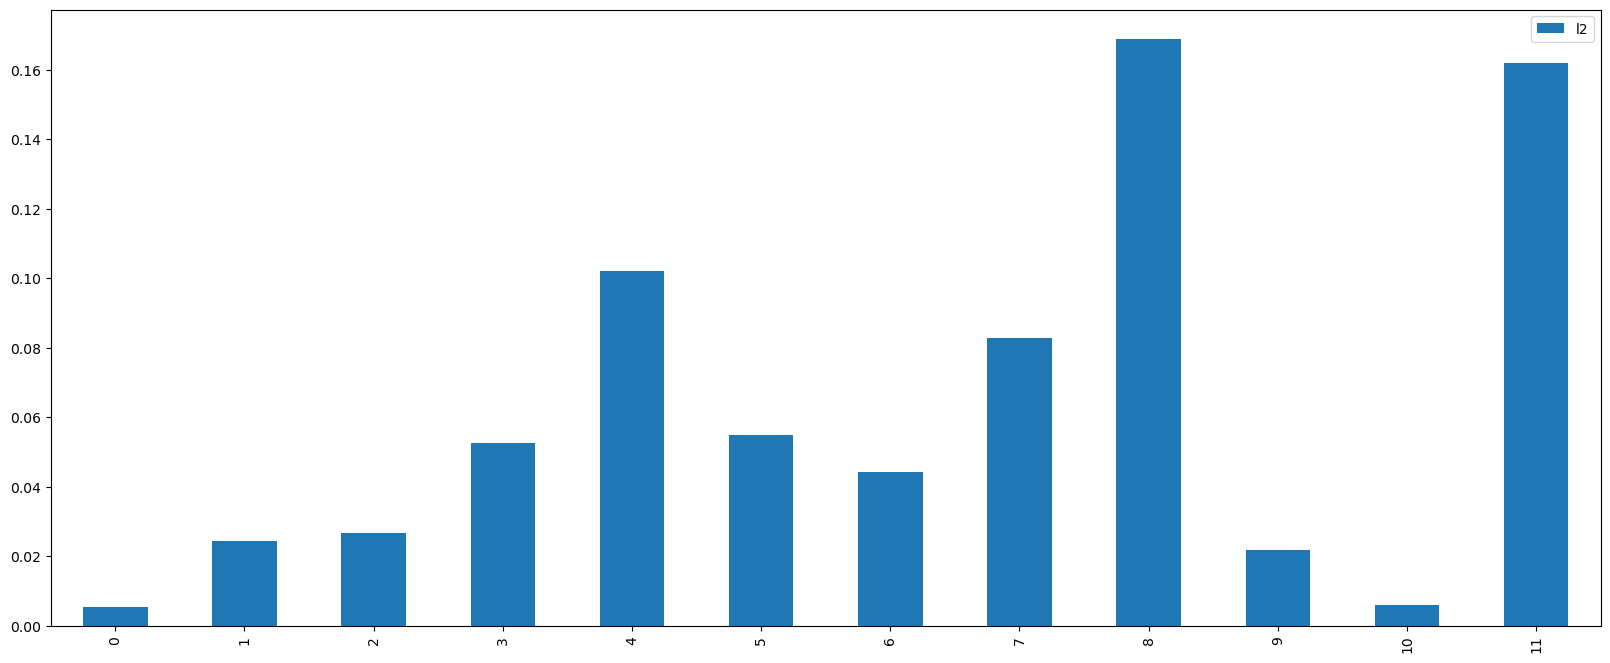

In [33]:
featureScores.plot.bar(figsize=(20, 8))

In [34]:
selected_list = featureScores.iloc[:, 1] > 5
indx = []

for i in range(len(selected_list)):
    if selected_list[i] == False:
        indx.append(i)
        featureScores = featureScores.drop(i, axis=0)

featureScores

,l1,l2


In [35]:
X_train_1 = pd.DataFrame(X_train).iloc[:, indx]
X_test_1 = pd.DataFrame(X_test).iloc[:, indx]
testdata_1 = pd.DataFrame(test_data).iloc[:, indx]

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
model = DecisionTreeClassifier(criterion='gini', min_samples_leaf=2, random_state=100)

In [38]:
model.fit(X_train_1, y_train)
accuracy_score(model.predict(X_test_1), y_test)

0.5329113924050632

In [39]:
from sklearn.feature_selection import mutual_info_classif

In [40]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=12)
fit = bestfeatures.fit(X_train, y_train)

In [41]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [42]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns=['l1', 'l2']
featureScores

,l1,l2
0,ID,0.003847
1,fixed acidity,0.040617
2,volatile acidity,0.053668
3,citric acid,0.048877
4,residual sugar,0.097759
5,chlorides,0.073567
6,free sulfur dioxide,0.059126
7,total sulfur dioxide,0.086801
8,density,0.173462
9,pH,0.038507


<Axes: >

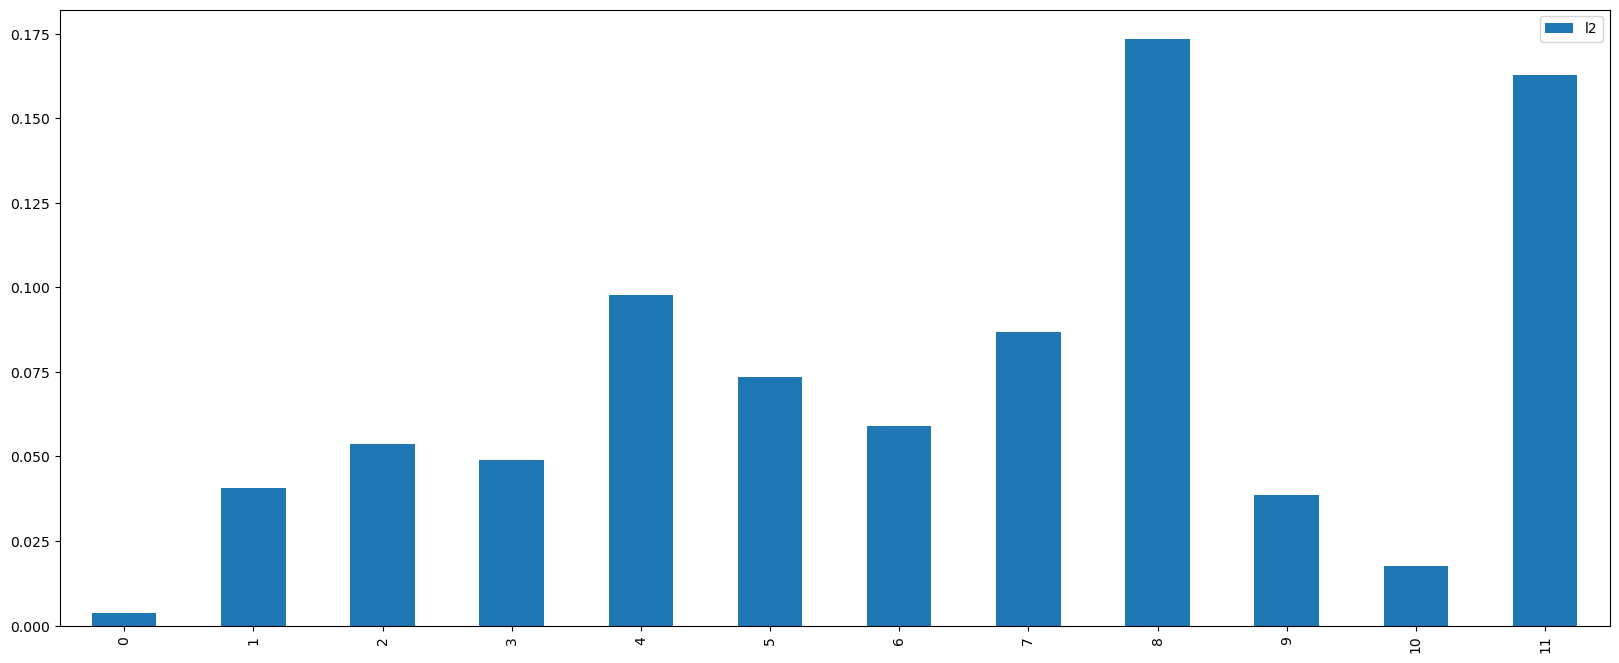

In [43]:
featureScores.plot.bar(figsize=(20, 8))

In [44]:
selected_list = featureScores.iloc[:, 1] > 0.05
indx = []

for i in range(len(selected_list)):
    if selected_list[i] == False:
        indx.append(i)
        featureScores = featureScores.drop(i, axis=0)

featureScores

,l1,l2
2,volatile acidity,0.053668
4,residual sugar,0.097759
5,chlorides,0.073567
6,free sulfur dioxide,0.059126
7,total sulfur dioxide,0.086801
8,density,0.173462
11,alcohol,0.162663


In [45]:
X_train_2 = pd.DataFrame(X_train).iloc[:, indx]
X_test_2 = pd.DataFrame(X_test).iloc[:, indx]
testdata_2 = pd.DataFrame(test_data).iloc[:, indx]

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
lm = LogisticRegression()
lr_model = lm.fit(X_train_2, y_train)
accuracy_score(lr_model.predict(X_test_2), y_test)

0.4506329113924051

In [48]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [49]:
from sklearn.ensemble import RandomForestClassifier

min_features_to_select = 1  
clf = RandomForestClassifier()
cv = StratifiedKFold(5)

rc_model = RFECV(estimator = clf, cv=cv, scoring="accuracy", min_features_to_select=min_features_to_select,n_jobs=2)
rc_model.fit(X_train, y_train)
print(f"Optimal number of features: {rc_model.n_features_}")
# rc_model.show()

Optimal number of features: 11


In [30]:
rc_model.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [31]:
indxs = []

for i in range(len(rc_model.support_)):
    if rc_model.support_[i] == True:
        indxs.append(i)

        
X_train_f = pd.DataFrame(X_train).iloc[:, indxs]
X_test_f = pd.DataFrame(X_test).iloc[:, indxs]
testdata_f = pd.DataFrame(test_data).iloc[:, indxs]

In [32]:
final_model = clf.fit(X_train_f, y_train)

In [33]:
accuracy_score(final_model.predict(X_test_f), y_test)

0.6734177215189874

In [36]:
from sklearn.svm import SVC

vis_model = RFECV(SVC(kernel='linear', C=1))

vis_model.fit(X_train, y_train)        # Fit the data to the visualizer         

RFECV(estimator=SVC(C=1, kernel='linear'))

In [44]:
indxs = []

for i in range(len(vis_model.support_)):
    if vis_model.support_[i] == True:
        indxs.append(i)


X_train_f1 = pd.DataFrame(X_train).iloc[:, indxs]
X_test_f1 = pd.DataFrame(X_test).iloc[:, indxs]
testdata_f1 = pd.DataFrame(test_data).iloc[:, indxs]

In [45]:
final_model1 = vis_model.fit(X_train_f1, y_train)

In [48]:
accuracy_score(final_model1.predict(X_test_f1), y_test)

0.5164556962025316

In [51]:
final_pred1 = final_model1.predict(testdata_f1)

ids = ss.iloc[:, 0]
df = pd.DataFrame({"ID": ids,
                    "Quality" : final_pred1})

In [52]:
df.to_csv("submission3.csv", index=False)